# Project: Wrangling and Analyze Data

### Import libraries

In [1]:
import pandas as pd
import requests

import numpy as np

import matplotlib.pyplot as plt

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

### I downloaded the file from udacity classroom

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

data = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
open('image-predictions.tsv', 'wb').write(data.content)

In [3]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

I could not gain approval to use API from twitter so I downloaded the file from the udacity classroom

In [4]:
tweet_json = pd.read_json('data wrangling project/twitter_json.txt', lines = True)
tweet_json = tweet_json[['created_at', 'id', 'retweet_count', 'favorite_count', 'lang',\
'in_reply_to_status_id', 'in_reply_to_screen_name', 'is_quote_status', 'quoted_status_id']]
tweet_json.head(2)

,created_at,id,retweet_count,favorite_count,lang,in_reply_to_status_id,in_reply_to_screen_name,is_quote_status,quoted_status_id
0,2017-08-01 16:23:56+00:00,892420643555336193,8853,39467,en,NaN,None,False,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,6514,33819,en,NaN,None,False,NaN


In [5]:
tweet_json.dtypes

created_at                 datetime64[ns, UTC]
id                                       int64
retweet_count                            int64
favorite_count                           int64
lang                                    object
in_reply_to_status_id                  float64
in_reply_to_screen_name                 object
is_quote_status                           bool
quoted_status_id                       float64
dtype: object

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual assessments
    The files can also be assessed using softwares because I downloaded them and saved into a file

In [6]:
twitter_archive.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1388,700462010979500032,NaN,NaN,2016-02-18 23:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Murphy. He's a mini golden retriever. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700462010...,6,10,Murphy,None,None,None,None
389,826476773533745153,NaN,NaN,2017-01-31 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pilot. He has mastered the synchronize...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826476773...,12,10,Pilot,doggo,None,None,None


In [7]:
image_predictions.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
360,672640509974827008,https://pbs.twimg.com/media/CVWy9v-VAAALSoE.jpg,1,Chesapeake_Bay_retriever,0.420155,True,Cardigan,0.266030,True,Labrador_retriever,0.042514,True
1792,830956169170665475,https://pbs.twimg.com/ext_tw_video_thumb/83095...,1,kuvasz,0.451516,True,golden_retriever,0.317196,True,English_setter,0.132759,True


In [8]:
tweet_json.sample(2)

,created_at,id,retweet_count,favorite_count,lang,in_reply_to_status_id,in_reply_to_screen_name,is_quote_status,quoted_status_id
898,2016-07-28 19:06:01+00:00,758740312047005698,1824,6339,en,NaN,None,False,NaN
1977,2015-12-05 03:28:25+00:00,672980819271634944,1079,1930,en,NaN,None,False,NaN


### Programmatic assessment

In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 9 columns):
created_at                 2354 non-null datetime64[ns, UTC]
id                         2354 non-null int64
retweet_count              2354 non-null int64
favorite_count             2354 non-null int64
lang                       2354 non-null object
in_reply_to_status_id      78 non-null float64
in_reply_to_screen_name    78 non-null object
is_quote_status            2354 non-null bool
quoted_status_id           29 non-null float64
dtypes: bool(1), datetime64[ns, UTC](1), float64(2), int64(3), object(2)
memory usage: 149.5+ KB


In [12]:
twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [13]:
image_predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [14]:
tweet_json.dtypes

created_at                 datetime64[ns, UTC]
id                                       int64
retweet_count                            int64
favorite_count                           int64
lang                                    object
in_reply_to_status_id                  float64
in_reply_to_screen_name                 object
is_quote_status                           bool
quoted_status_id                       float64
dtype: object

<b> check how many duplicated data</b>

In [15]:
def duplicates(id_column_name, data):
    return data[id_column_name].duplicated().sum()

In [16]:
print(f"{duplicates('tweet_id', twitter_archive)} duplicates")
print(f"{duplicates('tweet_id', image_predictions)} duplicates")
print(f"{duplicates('id', tweet_json)} duplicates")

0 duplicates
0 duplicates
0 duplicates


<b> I want to be sure there is no duplicate in the id since I saw that the expanded urls have duplictae values </b>

In [17]:
twitter_archive[twitter_archive['expanded_urls'] == 'https://www.gofundme.com/3ti3nps,https://twitter.com/dog_rates/status/868552278524837888/photo/1,https://twitter.com/dog_rates/status/868552278524837888/photo/1']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
124,868639477480148993,NaN,NaN,2017-05-28 01:26:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Cooper. His expres...,8.685523e+17,4.196984e+09,2017-05-27 19:39:34 +0000,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None


In [18]:
twitter_archive.describe(include = 'all')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
count,2.356000e+03,7.800000e+01,7.800000e+01,2356,2356,2356,1.810000e+02,1.810000e+02,181,2297,2356.000000,2356.000000,2356,2356,2356,2356,2356
unique,NaN,NaN,NaN,2356,4,2356,NaN,NaN,181,2218,NaN,NaN,957,2,2,2,2
top,NaN,NaN,NaN,2016-04-26 15:29:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm not sure what's happening here, but it's p...",NaN,NaN,2017-03-16 00:00:07 +0000,https://twitter.com/dog_rates/status/667182792...,NaN,NaN,None,None,None,None,None
freq,NaN,NaN,NaN,1,2221,1,NaN,NaN,1,2,NaN,NaN,745,2259,2346,2099,2326
mean,7.427716e+17,7.455079e+17,2.014171e+16,NaN,NaN,NaN,7.720400e+17,1.241698e+16,NaN,NaN,13.126486,10.455433,NaN,NaN,NaN,NaN,NaN
std,6.856705e+16,7.582492e+16,1.252797e+17,NaN,NaN,NaN,6.236928e+16,9.599254e+16,NaN,NaN,45.876648,6.745237,NaN,NaN,NaN,NaN,NaN
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,NaN,6.661041e+17,7.832140e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,6.783989e+17,6.757419e+17,3.086374e+08,NaN,NaN,NaN,7.186315e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN
50%,7.196279e+17,7.038708e+17,4.196984e+09,NaN,NaN,NaN,7.804657e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,NaN,NaN,NaN,NaN,NaN
75%,7.993373e+17,8.257804e+17,4.196984e+09,NaN,NaN,NaN,8.203146e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,NaN,NaN,NaN,NaN,NaN


In [19]:
image_predictions.describe(include = 'all')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


In [20]:
tweet_json.describe(include = 'all')

,created_at,id,retweet_count,favorite_count,lang,in_reply_to_status_id,in_reply_to_screen_name,is_quote_status,quoted_status_id
count,2354,2.354000e+03,2354.000000,2354.000000,2354,7.800000e+01,78,2354,2.900000e+01
unique,2354,NaN,NaN,NaN,9,NaN,31,2,NaN
top,2016-09-12 15:10:21+00:00,NaN,NaN,NaN,en,NaN,dog_rates,False,NaN
freq,1,NaN,NaN,NaN,2336,NaN,47,2323,NaN
first,2015-11-15 22:32:08+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-08-01 16:23:56+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.426978e+17,3164.797366,8080.968564,NaN,7.455079e+17,NaN,NaN,8.162686e+17
std,NaN,6.852812e+16,5284.770364,11814.771334,NaN,7.582492e+16,NaN,NaN,6.164161e+16
min,NaN,6.660209e+17,0.000000,0.000000,NaN,6.658147e+17,NaN,NaN,6.721083e+17
25%,NaN,6.783975e+17,624.500000,1415.000000,NaN,6.757419e+17,NaN,NaN,7.888183e+17


##### Check the number of recorded tweets

In [21]:
def check_number_of_tweets(df, data_name):
    print(f'the number of tweets in the {data_name} dataset is {df.shape[0]}')


check_number_of_tweets(twitter_archive, 'twitter archive')
check_number_of_tweets(tweet_json, 'tweet json')
check_number_of_tweets(image_predictions, 'image predictions')

the number of tweets in the twitter archive dataset is 2356
the number of tweets in the tweet json dataset is 2354
the number of tweets in the image predictions dataset is 2075


##### Check the twitter archive dataset and  the itwitter_json dataset to check for how many tweets that are retweeted

In [22]:
def is_retweeted(column,df):
    return len(df[df[column].notna()])


In [23]:
# tweet_json data

retweet_columns = ['in_reply_to_status_id', 'in_reply_to_screen_name',
       'quoted_status_id']
for i in retweet_columns:
    retweets = is_retweeted(i,tweet_json)
    print(f'{retweets} retweets in the {i} column')

78 retweets in the in_reply_to_status_id column
78 retweets in the in_reply_to_screen_name column
29 retweets in the quoted_status_id column


In [24]:
#  twitter_archive data

retweet_columns = ['in_reply_to_status_id','retweeted_status_id']
for i in retweet_columns:
    retweets = is_retweeted(i,twitter_archive)
    print(f'{retweets} retweets in the {i} column')

78 retweets in the in_reply_to_status_id column
181 retweets in the retweeted_status_id column


<b> I noticed the 'in_reply_to_status_id', 'in_reply_to_screen_name' in the twitter archive data and the 'in_reply_to_status_id' in the tweet_json data all have 78 values that are not null. So I want to check the id of the tweets to see if they are the same tweets

In [25]:
tweet_json[tweet_json['in_reply_to_status_id'].notna()].id.values\
== tweet_json[tweet_json['in_reply_to_screen_name'].notna()].id.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [26]:
tweet_json[tweet_json['in_reply_to_status_id'].notna()].id.values\
== twitter_archive[twitter_archive['in_reply_to_status_id'].notna()].tweet_id.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

<b> I want to check if the retweets according to the quoted_status_id is among the tweets in in_reply_to_screen_name

In [27]:
screen = tweet_json[tweet_json['in_reply_to_screen_name'].notna()].id.values.tolist()
quote = tweet_json[tweet_json['quoted_status_id'].notna()].id.values.tolist()
any(i in screen for i in quote)

False

<b> I want to be sure the retweets from in reply to status is different from the retweeted status in the twitter archive data</b>

In [28]:
reply = twitter_archive[twitter_archive['in_reply_to_status_id'].notna()].tweet_id.values.tolist()
retweet = twitter_archive[twitter_archive['retweeted_status_id'].notna()].tweet_id.values.tolist()
any(i in screen for i in quote)

False

In [29]:
181+78

259

<b> Thus I have a total of 29 +78 retweets = 107 retweets in the tweet_json data
    and atotal of 181 + 78 retweets = 259 retwets in the twitter_archive data </b>

<b> check the tweets in the twitter_json data is not older than August 01 2017

In [30]:
tweet_json.columns

Index(['created_at', 'id', 'retweet_count', 'favorite_count', 'lang',
       'in_reply_to_status_id', 'in_reply_to_screen_name', 'is_quote_status',
       'quoted_status_id'],
      dtype='object')

In [31]:
def isolder(column_name, data):
    return data[data[column_name] > '2017-08-02']
older_archive = len(isolder('timestamp',twitter_archive))
older_json = len(isolder('created_at', tweet_json))
print(f"{older_archive} tweets in twitter_archive are older than August 1st 2017")
print(f"{older_json} tweets in tweet_json are older than August 1st 2017")

0 tweets in twitter_archive are older than August 1st 2017
0 tweets in tweet_json are older than August 1st 2017


<b> I want to check the tweets that are not dog ratings </b>

In [32]:
not_dog =image_predictions[(image_predictions['p1_dog'] == False) |\
                           (image_predictions['p2_dog'] == False) |\
                           (image_predictions['p3_dog'] == False)]

print(f'The number of tweets that are not dog ratings from the image prediction data are {len(not_dog)}')

The number of tweets that are not dog ratings from the image prediction data are 832


<b> I want to check if the three dataset have the same id</b>

In [33]:
all(i in twitter_archive['tweet_id'].values for i in image_predictions['tweet_id'].values)

True

In [34]:
all(i in image_predictions['tweet_id'].values for i in twitter_archive['tweet_id'].values)

False

In [35]:
all(i in tweet_json['id'].values for i in image_predictions['tweet_id'].values)

False

In [36]:
all(i in image_predictions['tweet_id'].values for i in tweet_json['id'].values)

False

In [37]:
all(i in twitter_archive['tweet_id'].values for i in tweet_json['id'].values)

True

In [38]:
all(i in tweet_json['id'].values for i in twitter_archive['tweet_id'].values)

False

### Quality issues
<b> twitter_archive table </b>
   
1. validity:- missing `name` , `doggo` , `floofer` , `pupper` , `puppo` values represented  as 'none'.

2. Completeness:- missing `expanded_url`, `name` values and `doggo` , `floofer` , `pupper` , `puppo` have so many missing values.

3. Consistency:- `retweeted_status_id`, `retweeted_status_user_id` missing values are represented as nan not numpy NaN

4. Consistency:- `timestamp` should be of type datetime.

5. validity:- the `in_reply_to_status_id`indicates there are 78 retweets and not original tweets

6. validity:- the `retweeted_status_id` indicates there are 181 retweets and not original tweets

<b> image_predictions table </b>

7. validity:- `p1`, `p2` and `p3` contains values not related to tweets about dogs. Further assessments on the image_predictions data indicates that 832 tweets in the table are not related to dog tweets.

<b> tweet_json table </b>

8. validity :- the `quoted_staus_id` indicates there are 29 retweets and not original tweets

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [39]:
# Make copies of original pieces of data
twitter_archive_copy = twitter_archive.copy()
image_prediction_copy = image_predictions.copy()
tweet_json_copy = tweet_json.copy()

### Issue #1: missing name values represented as none.

#### Define: change missing values to numpy NaN

#### Code

In [40]:
twitter_archive_copy['name'].replace('None',np.nan, inplace = True)
twitter_archive_copy['doggo'].replace('None',np.nan, inplace = True)
twitter_archive_copy['floofer'].replace('None',np.nan, inplace = True)
twitter_archive_copy['pupper'].replace('None',np.nan, inplace = True)
twitter_archive_copy['puppo'].replace('None',np.nan, inplace = True)

#### Test

In [41]:
print('name', +twitter_archive_copy['name'].isna().sum())
print('doggo', +twitter_archive_copy['doggo'].isna().sum())
print('floofer', +twitter_archive_copy['floofer'].isna().sum())
print('pupper', +twitter_archive_copy['pupper'].isna().sum())
print('puppo', +twitter_archive_copy['puppo'].isna().sum())

name 745
doggo 2259
floofer 2346
pupper 2099
puppo 2326


### Issue #2: missing `expanded_url`, `name` values and `doggo` , `floofer` , `pupper` , `puppo` have so many missing values.

#### Define: delete rows that have expanded_url and name values AND delete the doggo, floofer, pupper and puppo columns

#### Code

In [42]:
twitter_archive_copy = twitter_archive_copy.dropna(subset = ['expanded_urls', 'name'])

#### Test

In [43]:
print(twitter_archive_copy['expanded_urls'].isna().sum())
print(twitter_archive_copy['name'].isna().sum())

0
0


#### Code

In [44]:
twitter_archive_copy = twitter_archive_copy.drop(['doggo','floofer','pupper','puppo'], axis = 1)

#### Test

In [45]:
table_columns = twitter_archive_copy.columns.tolist()
deleted_columns = ['doggo','floofer','pupper','puppo']
any(i in deleted_columns for i in table_columns)

False

### Issue #3: retweeted_status_id, retweeted_status_user_id missing values are represented as nan not numpy NaN

#### Define: change nan to numpy Nan

#### Code

In [46]:
twitter_archive_copy['retweeted_status_id'] = twitter_archive_copy['retweeted_status_id'].replace('nan', np.nan)

In [47]:
twitter_archive_copy['retweeted_status_user_id'] = twitter_archive_copy['retweeted_status_user_id'].replace('nan', np.nan)

#### Test

In [48]:
twitter_archive_copy['retweeted_status_id'].isna().sum()

1495

In [49]:
twitter_archive_copy['retweeted_status_user_id'].isna().sum()

1495

### Issue #4: timestamp should be of type datetime

#### Define: change type to datetime

#### Code

In [50]:
twitter_archive_copy['timestamp'] = twitter_archive_copy['timestamp'].apply(pd.to_datetime, utc = True)

#### Test

In [51]:
twitter_archive_copy['timestamp'].dtype

datetime64[ns, UTC]

### Issue #5: the in_reply_to_status_id indicates there are 78 retweets and not original tweets

#### Define: keep the rows that are null in this column

#### Code

In [52]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['in_reply_to_status_id'].isna()]

#### Test

In [53]:
twitter_archive_copy['in_reply_to_status_id'].notna().sum()

0

### Issue #6: the retweeted_status_id   indicates there are 181 retweets and not original tweets

#### Define: keep the rows that are null in this column

#### Code

In [54]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['retweeted_status_id'].isna()]

#### Test

In [55]:
twitter_archive_copy['retweeted_status_id'].notna().sum()

0

### Issue #7: p1, p2 and p3 contains values not related to tweets about dogs. Further assessments on the image_predictions data indicates that 832 tweets in the table are not related to dog tweets.

#### Define: Remove the rows that have `p1_dog`, `p2_dog` and `p3_dog` as false

#### Code

In [56]:
image_prediction_copy = image_prediction_copy.drop(image_prediction_copy[(image_prediction_copy['p1_dog'] == False) |\
                           (image_prediction_copy['p2_dog'] == False) |\
                           (image_prediction_copy['p3_dog'] == False)].index)

#### Test

In [57]:
not_dog =image_prediction_copy[(image_prediction_copy['p1_dog'] == False) |\
                           (image_prediction_copy['p2_dog'] == False) |\
                           (image_prediction_copy['p3_dog'] == False)]

print(f'The number of tweets that are not dog ratings from the image prediction data are {len(not_dog)}')

The number of tweets that are not dog ratings from the image prediction data are 0


### Issue #8: the quoted_staus_id indicates there are 29 retweets and not original tweets

#### Define:  keep the rows that have null values

#### Code

In [58]:
tweet_json_copy = tweet_json_copy[tweet_json_copy['quoted_status_id'].isna()]

#### Test

In [59]:
tweet_json_copy['quoted_status_id'].notna().sum()

0

### Tidy issues

### Issue #1

####  a:  in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp should be removed after the retweeted observations have been removed.

#### Define:

#### Code

In [60]:
twitter_archive_copy = twitter_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id',\
                                                  'retweeted_status_id','retweeted_status_user_id',\
                                                  'retweeted_status_timestamp'],axis = 1)

#### Test

In [61]:
table_columns = twitter_archive_copy.columns.tolist()
deleted_columns = ['doggo','floofer','pupper','puppo']
any(i in deleted_columns for i in table_columns)

False

##### b. the column timestamp should be renamed to created_at

#### Define: rename timestamp to created_at

#### Code

In [62]:
twitter_archive_copy = twitter_archive_copy.rename(columns = {'timestamp': 'created_at'})

#### Test

In [63]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

##### c. The columns:- in_reply_to_status_id in_reply_to_screen_name is_quote_status quoted_status_id should be removed after the retweeted observations have been removed.

#### Define: drop the columns : in_reply_to_status_id,  in_reply_to_screen_name,  is_quote_status, quoted_status_id from the table

#### Code

In [64]:
tweet_json_copy = tweet_json_copy.drop(['in_reply_to_status_id', 'in_reply_to_screen_name',\
                                        'is_quote_status', 'quoted_status_id' ],axis = 1)

#### Test

In [65]:
table_columns = tweet_json_copy.columns.tolist()
deleted_columns = ['in_reply_to_status_id', 'in_reply_to_screen_name', 'is_quote_status', 'quoted_status_id']
any(i in deleted_columns for i in table_columns)

False

### Issue #2: The number of observation in each of the data is different, only the observation with the id's in three data will be merged

### Tidiness issues
 

1. 
<b> twitter_archive table </b>
        
    a. The columns:- in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp should be removed after the retweeted observations have been removed.
    
    b. the column `timestamp` should be renamed to `created_at`
    
    
  <b> tweet_json table </b>
     
    c. The columns:- 	in_reply_to_status_id	in_reply_to_screen_name	is_quote_status	quoted_status_id should be removed after the retweeted observations have been removed
     

2. The number of observation in each of the data is different, only the observation with the id's in three data will be merged and the 

#### Define:  merge both image_predictions and twitter_archive based on the id present in both tables using pd.merge (inner)

#### Code

In [66]:
merge = pd.merge(image_prediction_copy, twitter_archive_copy, on = 'tweet_id')
merge.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,source,text,expanded_urls,rating_numerator,rating_denominator,name
0,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a
1,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a


#### Test

In [67]:
image_prediction_columns = image_prediction_copy.columns.tolist()
merge_columns = merge.columns.tolist()
all(i in merge_columns for i in image_prediction_columns)

True

#### Define:  merge tweet_archive withe merged table based on the id present in both tables using pd.merge (inner)

#### Code

In [68]:
# First rename id column in tweet_archive to tweet_id
tweet_json_copy = tweet_json_copy.rename(columns = {'id': 'tweet_id'})

In [69]:
merge = pd.merge(merge, tweet_json_copy, on = ['tweet_id', 'created_at'])
merge.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,created_at,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,lang
0,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,48,132,en
1,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,47,128,en


#### Test

In [70]:
tweet_json_columns = tweet_json_copy.columns.tolist()
merge_columns = merge.columns.tolist()
all(i in merge_columns for i in tweet_json_columns)

True

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [71]:
merge.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [72]:
merge.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,created_at,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,lang
0,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,48,132,en
1,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,47,128,en


In [73]:
merge['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     891
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      12
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      4
Name: source, dtype: int64

In [74]:
bins = np.linspace(min(merge['retweet_count']), max(merge['retweet_count']), 5)
group_names = ['very low counts', 'low counts', 'high counts', 'very high counts']
merge['retweet_counts_binned'] = pd.cut(merge['retweet_count'], bins, labels=group_names, include_lowest=True )
merge['retweet_counts_binned'].value_counts()

very low counts     893
low counts            9
high counts           3
very high counts      2
Name: retweet_counts_binned, dtype: int64

### Insights:
1. Most tweets had very low reteet counts ranging from 23 to 14200 retweet counts the mmaximum retweet count is 56,600

2. Most tweets were made using twitter for Iphone

3. Tweets with image number of 1 are the highest

### Visualization

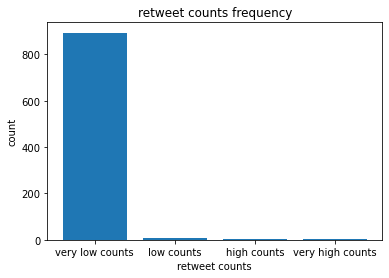

In [75]:
plt.bar(group_names, merge['retweet_counts_binned'].value_counts())
plt.xlabel("retweet counts")
plt.ylabel("count")
plt.title("retweet counts frequency")
plt.savefig('retweet counts frequency.jpg')

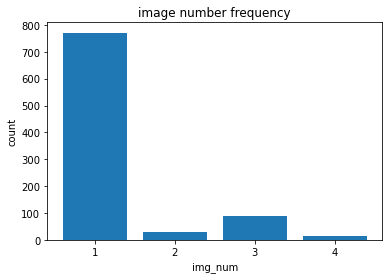

In [76]:
merge['img_num'].value_counts()
plt.bar(merge['img_num'].unique(), merge['img_num'].value_counts(), )
plt.xticks([1,2,3,4])
plt.xlabel("img_num")
plt.ylabel("count")
plt.title("image number frequency")
plt.savefig('image number frequency.jpg')